# LeNet

## 构建网络

In [1]:
import torch
from torch import nn
import My_utils

class Reshape(nn.Module):
    def forward(self,X):
        return X.view(-1,1,28,28)

net = nn.Sequential(
    Reshape(), nn.Conv2d(1,6,kernel_size=5,padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Conv2d(6,16,kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2,stride=2), nn.Flatten(),
    nn.Linear(16*5*5,120), nn.Sigmoid(),
    nn.Linear(120,84), nn.Sigmoid(),
    nn.Linear(84,10)
)

### 测试网络

In [2]:
X = torch.rand(size=(1,1,28,28),dtype=torch.float)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'   ',X.shape)

Reshape     torch.Size([1, 1, 28, 28])
Conv2d     torch.Size([1, 6, 28, 28])
Sigmoid     torch.Size([1, 6, 28, 28])
AvgPool2d     torch.Size([1, 6, 14, 14])
Conv2d     torch.Size([1, 16, 10, 10])
Sigmoid     torch.Size([1, 16, 10, 10])
AvgPool2d     torch.Size([1, 16, 5, 5])
Flatten     torch.Size([1, 400])
Linear     torch.Size([1, 120])
Sigmoid     torch.Size([1, 120])
Linear     torch.Size([1, 84])
Sigmoid     torch.Size([1, 84])
Linear     torch.Size([1, 10])


## 训练

loss 0.184, train acc 0.931, test acc 0.888
14149.5 examples/sec on cuda:0


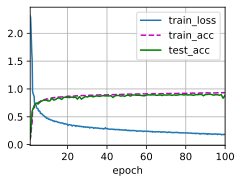

In [3]:
batch_size = 256
train_iter,test_iter = My_utils.load_data_from_fashion_MNIST(batch_size=batch_size)
lr,num_epochs = 0.9,100
My_utils.train_gpu(net,train_iter,test_iter,num_epochs,lr,My_utils.try_gpu())